<a href="https://colab.research.google.com/github/leo-contigo/DeepLearning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_03%EC%9E%A5_%EC%B5%9C%EC%86%8C%EC%A0%9C%EA%B3%B1%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# 코랩 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,221 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# 4장 가장 훌률한 예측선
- 선형회귀<br>
: 독립변수 x를 사용하여 종속변수 y의 움직임을 예측하고 설명하는 작업

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프 설정 
plt.rcParams['font.family'] = 'malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 그래프 설정 (코랩 한글)
plt.rc('font' , family='NanumBarunGothic')

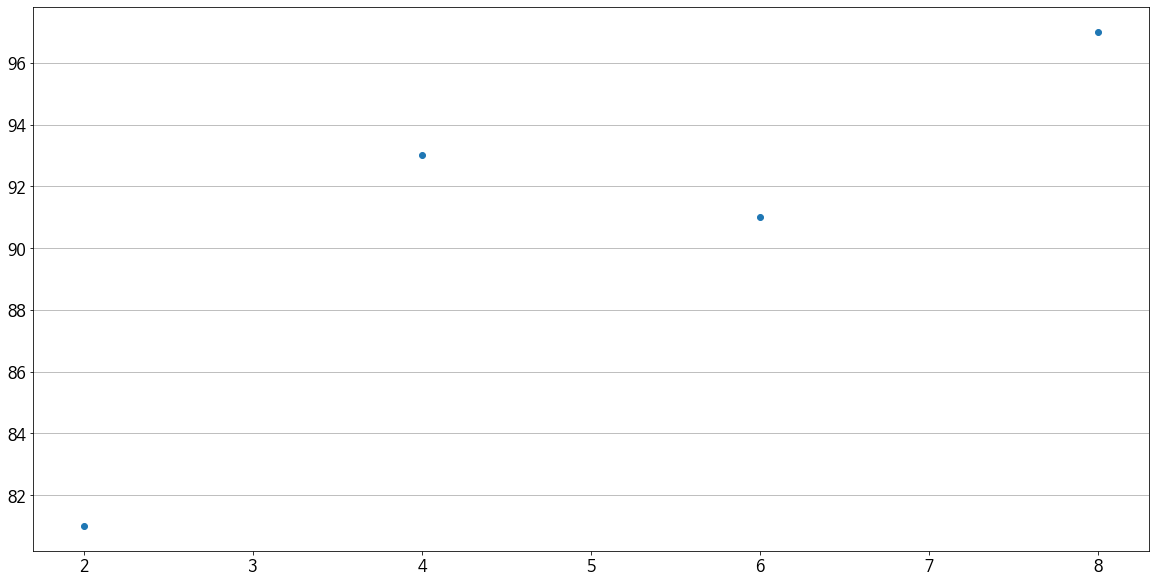

In [2]:
# 공부한 시간과 중간고사 성적 데이터
# 학습 데이터 
공부한시간 = [2, 4, 6, 8]
성적 = [81, 93, 91, 97]

# 그래프 보기 
plt.scatter(공부한시간, 성적)
plt.grid(True, axis='y')
plt.show()

In [6]:
# 일차함수 그래프

# y = ax + b




# 최소 제곱법

- 선형회귀는 정확한 예측선을 찾는 작업이다.

- 예측선은 직선을 의미한다.

### y = ax + b

- 라는 공식을 사용.
- x : 독립변수
- y : 종속변수

x값에 따라 y값은 달라진다. 정확하게 알기 위해서는 a, b의 값을 알아야함.


- 이 때 a는 기울기를 의미하며 b는 y 절편을 의미한다.
- 즉, 선형회귀는 정확한 예측선을 찾기 위해 최적의 기울기 y 와 절편을 찾는 것을 의미한다.
- 이 때, 최소 제곱법이 제공하는 공식을 이용하면 기울기와 절편을 계산 할 수 있다.

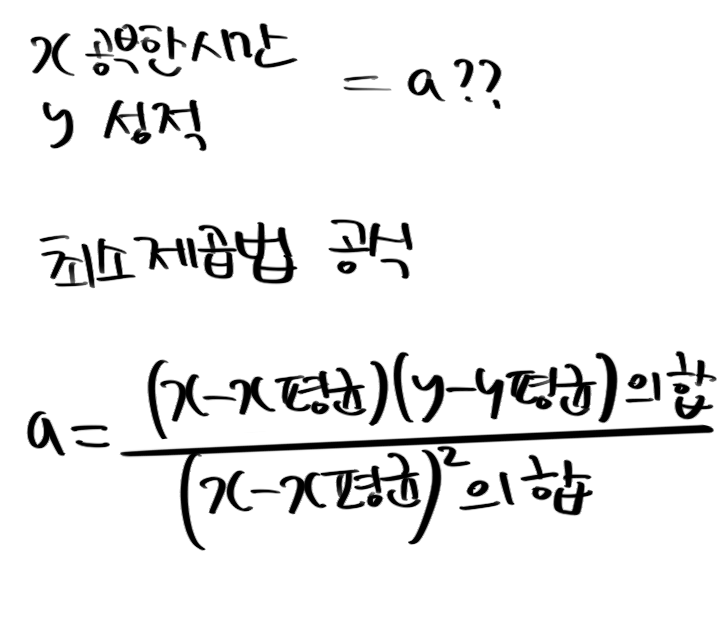

---
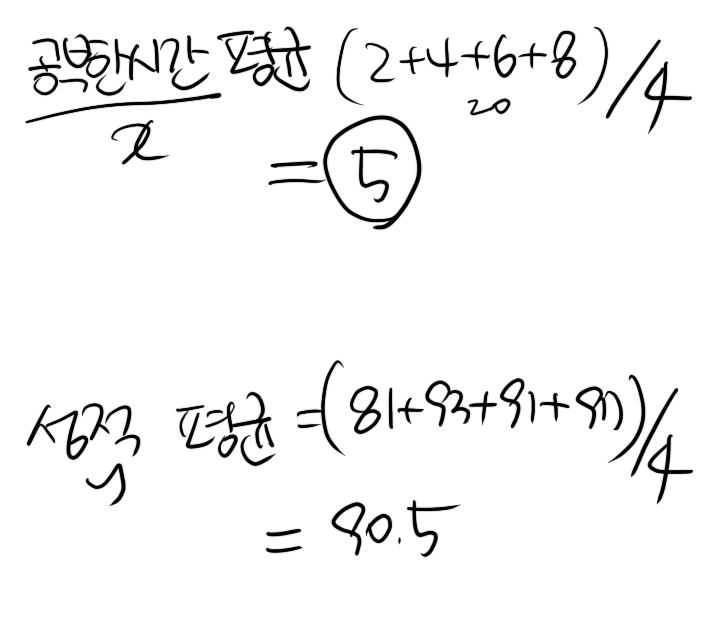

---

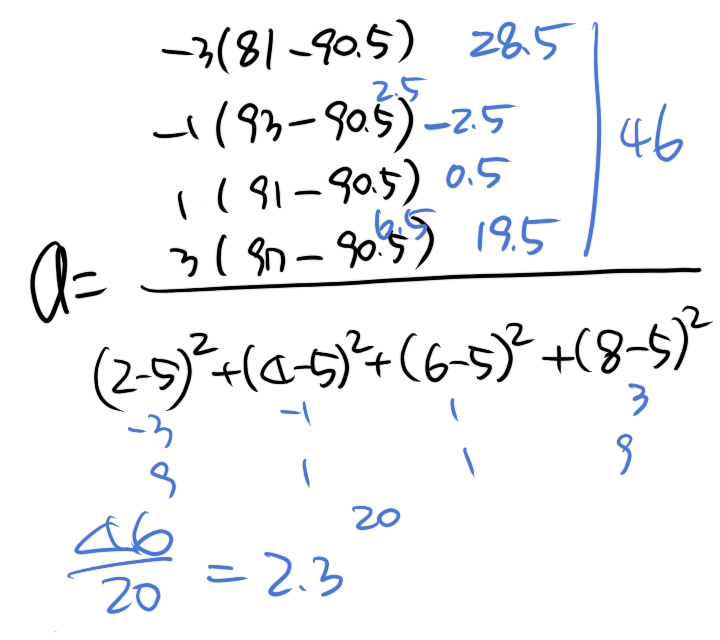

---

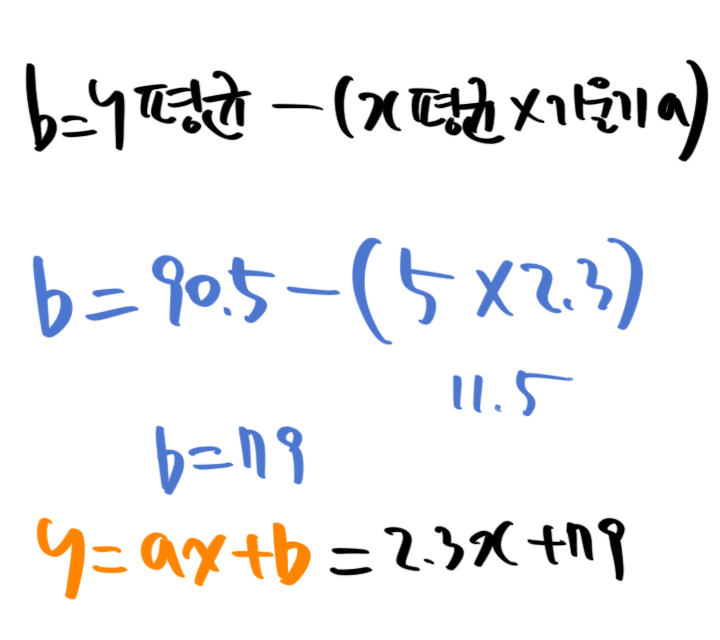

# 코딩으로 계산 최소제곱법

- 정확한 기울기 a와 정확한 y 절편의 값 b를 알아내는 간단한 방법


#### 최소 제곱법 (method of least squares)

In [3]:
# 계산을 용이하기 위해 ndarray를 생성
a1 = np.array(공부한시간)
# a1 = np.array([2,4,6,8])

a2 = np.array(성적)
# a2 = np.array([81, 93, 91, 97])

In [4]:
# x의 평균과 y의 평균을 구한다.
x_mean = a1.mean()
y_mean = a2.mean()

print(x_mean)
print(y_mean)

5.0
90.5


## 분모

In [7]:
# (x - x평균)²의 합
sum( [(i - x_mean)**2 for i in a1])
divisor = sum( [(i - x_mean)**2 for i in a1])
divisor

20.0

In [8]:
# 기울기 계산을 위한 분모를 구한다.

a100 = 0

for a200 in 공부한시간 :
    a100 = a100 + ((a200 - x_mean) ** 2 )

print(a100)

20.0


## 분자

In [9]:
# (x - x평균)(y) - y평균)의 합
def top(a1, x_mean, a2, y_mean):
  d = 0
  for i in range(len(a1)):
    d += (a1[i]-x_mean)*(a2[i]-y_mean)
  return d
top(a1, x_mean, a2, y_mean)

diidend = top(a1, x_mean, a2, y_mean)
diidend 

46.0

In [10]:
# 기울기 계산을 위한 분자를 구한다.

a300 = 0

for idx in range(len(공부한시간)) :
    a300 = a300 + ((공부한시간[idx] - x_mean)) *  (성적[idx] - y_mean)

print(a300)

46.0


In [11]:
a = diidend  / divisor
a

2.3

In [12]:
# 분자를 분모로 나눠서 기울기를 구한다.

기울기 = a300 / a100
print(기울기)

2.3


In [13]:
# y절편 b = y_mean -(x_mean * a)
b = y_mean -(x_mean * a)
b

79.0

In [14]:
# y 절편
# b = y 의 평균 - ( x 의 평균 * 기울기 a)

y절편 = y_mean - (x_mean * 기울기)
print(y절편)

79.0


In [15]:
# 정리하면
print('x의 평균 : ', x_mean)
print('y의 평균 : ', y_mean)
print('-----------------------------')
print('분모 : ', divisor)
print('분자 : ', diidend)
print('-----------------------------')
print('기울기 a : ', a)
print('y 절편 b : ', b)

x의 평균 :  5.0
y의 평균 :  90.5
-----------------------------
분모 :  20.0
분자 :  46.0
-----------------------------
기울기 a :  2.3
y 절편 b :  79.0


# 값을 예측해서 실제 값과 비교

In [16]:
예측성적 = []

for v1 in a1:
  a2 = (a * v1) + b
  예측성적.append(a2)

# for v1 in 공부한시간 :
#     a1 = (기울기 * v1) + y절편
  # 예측성적.append(a1)
    
예측성적

[83.6, 88.2, 92.8, 97.4]

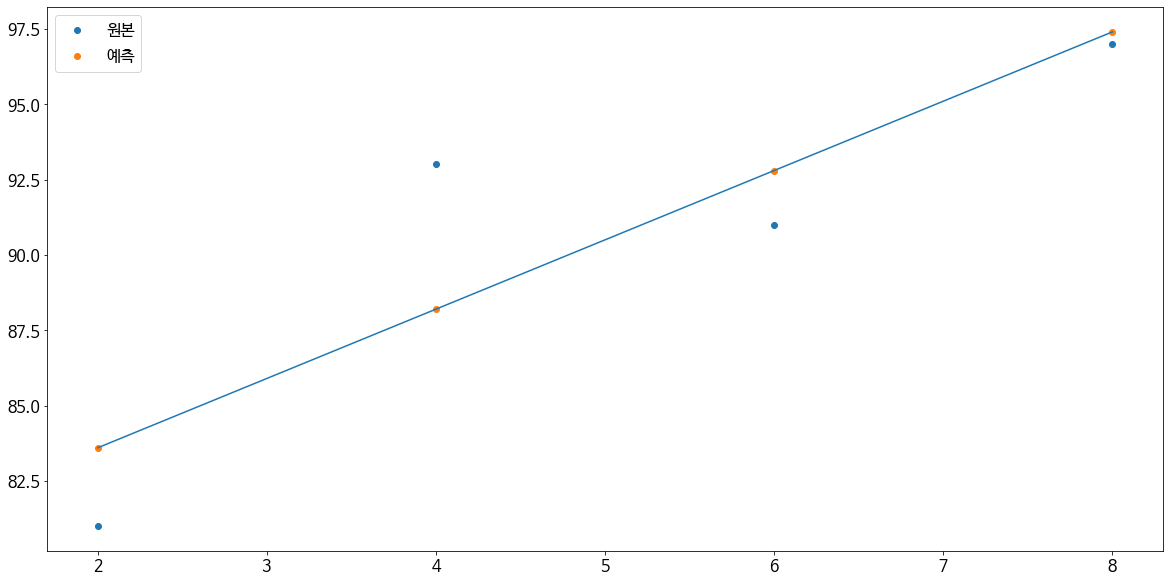

In [17]:
# 시각화 
plt.scatter(공부한시간, 성적, label = '원본')

plt.scatter(공부한시간, 예측성적, label = '예측')

plt.plot(a1, 예측성적)
# plt.plot(공부한시간, 예측성적)
plt.legend()
plt.show()

In [18]:
# 10 시간 공부한 경우
pred = (a * 10) + b
pred

102.0